#***Car number recognition system***

Automatic Number Plate Recognition Using  EasyOCR + OpenCV - Deep Learning



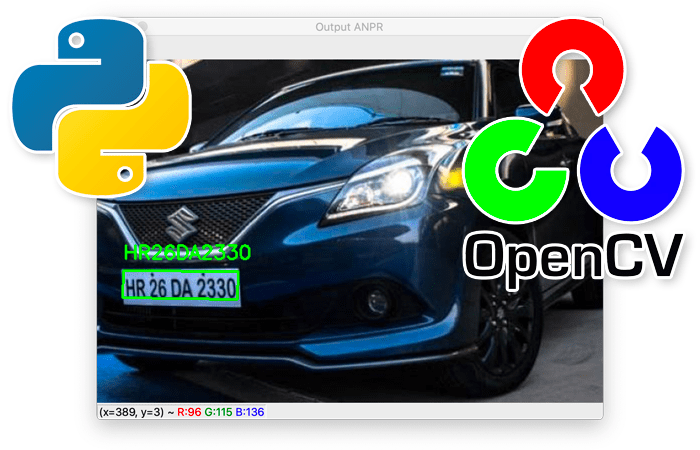

### **Step 1 : insatlling & importing the required packages**

In [ ]:
!pip install easyocr
!pip install imutils #Imutils is a package based on OpenCV, which can call the opencv interface more simply. It can easily realize a series of operations such as image translation, rotation, scaling, skeletonization and so on


In [ ]:
!pip install opencv-python-headless==4.1.2.30

In [ ]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import easyocr
import imutils

###**Step 2 : import image to preprocess**

In [70]:
image = "/content/3_ser_conv_download_12[1].jpg"    # Image Path

###**Step 4 : Read image & Convert color image into GrayScale Format**

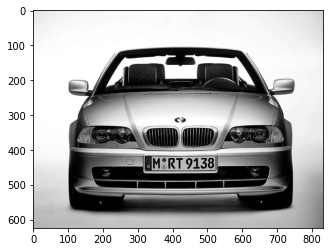

In [71]:
img = cv2.imread(image)   # Read Image using imread()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)   # Convert Color image into Gray Format
plt.imshow(cv2.cvtColor(gray , cv2.COLOR_BGR2RGB)) # Display Image

###**Step 5 : Apply Filter & Edeage Detecation**


1.   Using Filter reduce all unnecessary data from image
2.   And Display only edges Using cv2.Canny()



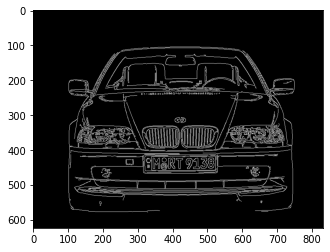

In [72]:
bfilter = cv2.bilateralFilter(gray , 11,17,17)   # Reduce Noise Using Filter
edged = cv2.Canny(bfilter,30,200)  # Edgeses Detection Using Canny()

plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB)) # Display image

###**Step 6 : Find Contours & apply Mask**



*   Find all Contoures Keypoint in image and store in variable (Keypoint) 


In [73]:
Keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # Contours Keypoints
contours = imutils.grab_contours(Keypoints)  # Store Key ponit in Contours 
contours = sorted(contours ,key=cv2.contourArea ,reverse=True)[:10] # Sort the contours in descending order & Get First 10 contours



*   collect 4 keyponit contours only and store in location variable,

*   because of the car number plate is always in rectangle shape that means '4' keypoint



In [74]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [75]:
location  

array([[[523, 419]],

       [[520, 458]],

       [[340, 457]],

       [[341, 419]]], dtype=int32)

only display location pixel & off all pixel value except location

In [76]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)  # Convert into bitwise

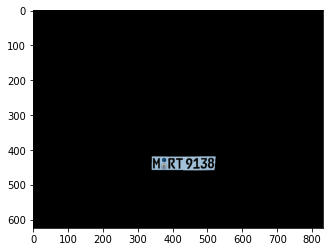

In [77]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))  # Display location Value

###**Step 7 :Crop only number plat location in the image and Display The Cropped_image**

In [78]:
(x,y) = np.where(mask==255)  # Choose location
(x1,y1) = (np.min(x),np.min(y)) # Get Min Value
(x2,y2) = (np.max(x),np.max(y)) # get Max value

Cropped_image = gray[x1:x2+1,y1:y2+1]  # Select 

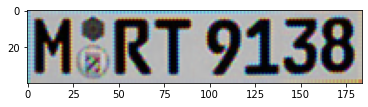

In [79]:
plt.imshow(cv2.cvtColor(Cropped_image,cv2.COLOR_BAYER_BG2RGB)) # Display Cropped Image  & Use this cropped image for EsayOcr Model Text Detection

###======================== **EasyOCR Model start** ================================

###**Step 8:** 

What is EasyOCR? EasyOCR is a python package that allows the image to be converted to text. It is by far the easiest way to implement OCR and has access to over 70+ languages including English, Chinese, Japanese, Korean, Hindi, many more are being added. 

####**"en" means English Text & "hi" means Hindi Text** 

In [80]:
reader = easyocr.Reader(["en"])  # Create function for read the text ("reader")
Output = reader.readtext(Cropped_image)   # Read Text From Image (extract text from a given image)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [81]:
Output    # Display the Output text

[([[0, 0], [184, 0], [184, 40], [0, 40]], 'MBRT 9138', 0.9168650720150348)]

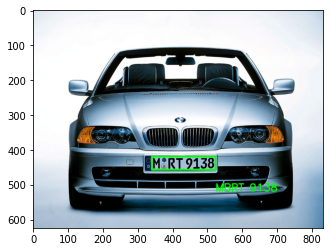

In [82]:
text = str.upper(Output[0][1])
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

###========================= **END** ==================================